In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import glob
import os

In [3]:
cio_dir = '/Users/patrickhawbecker/Code/Python/CIO'
bed_time = '7:30 PM'
wake_up = '7:00 AM'

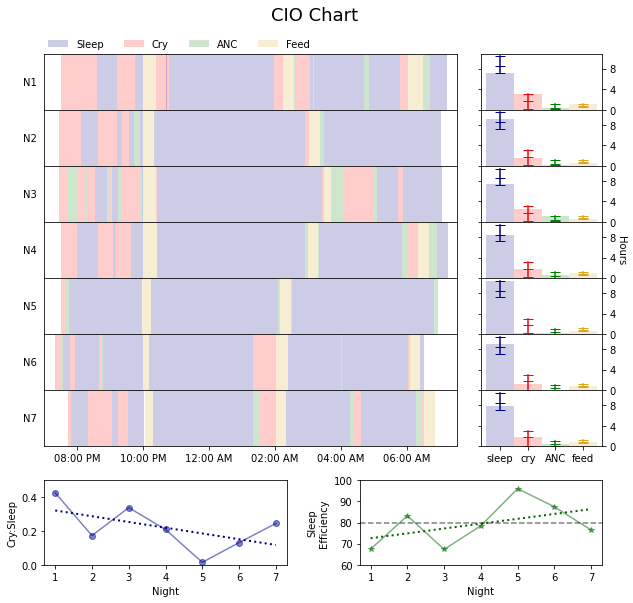

In [56]:
cio_files = sorted(glob.glob(os.path.join(cio_dir,'*.csv')))

event_color_dict = {'sleep':'darkblue',
                    'cry':'red',
                    'ANC': 'green',
                    'feed':'goldenrod'}

ndays = len(cio_files)
fig = plt.figure(figsize=(10,ndays*1.2 + 1),facecolor='white')
gs = plt.GridSpec(ndays, 4, figure=fig,hspace=0)
gs2 = plt.GridSpec(1, 2, figure=fig,wspace=0.3)
gs.update(bottom=0.3)
gs2.update(top=0.25)

event_log = {}

csr,sleep_efficiency = [],[]

for dd,cio_f in enumerate(cio_files):
    event_counter = {'sleep':0,
                     'cry':0,
                     'ANC':0,
                     'feed':0}
    
    pax = fig.add_subplot(gs[dd, :3])
    
    cio_df = pd.read_csv(cio_f,parse_dates=True,index_col=0)
    day = cio_df.iloc[0].name.strftime('%Y-%m-%d')
    #day = cio_df.iloc[0].name.strftime('%m/%d/%y')
    
    plt_start = pd.to_datetime(day) + pd.to_timedelta(pd.to_datetime(bed_time).hour,'h') + \
                pd.to_timedelta(pd.to_datetime(bed_time).minute,'min') - pd.to_timedelta(30,'min')
    plt_end = pd.to_datetime(day) + pd.to_timedelta(pd.to_datetime(wake_up).hour,'h') +  \
                pd.to_timedelta(pd.to_datetime(wake_up).minute,'min') + pd.to_timedelta(30,'min') + \
                pd.to_timedelta(1,'day')

    for event in cio_df.index:
        event_type = cio_df.loc[event].event.replace(' ','')
        event_length = cio_df.loc[event].length
        event_counter[event_type] += event_length
        event_start = event
        event_end = event_start + pd.to_timedelta(event_length,'min')
        event_c = event_color_dict[event_type]
        pax.fill_betweenx([0,1],event_start,event_end,color=event_c,alpha=0.2,lw=0.0)
    xticks = pd.date_range(pd.to_datetime(day),pd.to_datetime(day)+pd.to_timedelta(2,'day'),freq='2h')
    xtick_lbls = []
    for xt in xticks:
        xtick_lbls += [xt.strftime('%I:%M %p')]
    pax.set_xticks(xticks)
    pax.set_xticklabels(xtick_lbls)

    pax.set_xlim(plt_start,plt_end)
    pax.set_ylim(0,1)
    pax.set_yticks([0.5])
    pax.set_yticklabels(['N{}'.format(dd+1)],va='center')
    pax.tick_params(left=False)
    
    # Cry-to-sleep ratio
    csr += [event_counter['cry']/event_counter['sleep']]
    sleep_efficiency += [100.0*event_counter['sleep']/(sum(event_counter.values()) - event_counter['feed'])]

    event_log[day] = event_counter

sleep = []
feed = []
anc = []
cry = []
for day in event_log:
    sleep += [event_log[day]['sleep']/60.0]
    cry += [event_log[day]['cry']/60.0]
    anc += [event_log[day]['ANC']/60.0]
    feed += [event_log[day]['feed']/60.0]
    
max_time = np.max([sleep,cry,anc,feed])
max_sleep = np.max(sleep)
min_sleep = np.min(sleep)
avg_sleep = np.mean(sleep)

max_feed = np.max(feed)
min_feed = np.min(feed)
avg_feed = np.mean(feed)

max_cry = np.max(cry)
min_cry = np.min(cry)
avg_cry = np.mean(cry)

max_anc = np.max(anc)
min_anc = np.min(anc)
avg_anc = np.mean(anc)
    
for dd,day in enumerate(event_log):
    pax2 = fig.add_subplot(gs[dd, 3])
    sleep = [event_log[day]['sleep']/60.0]
    cry = [event_log[day]['cry']/60.0]
    anc = [event_log[day]['ANC']/60.0]
    feed = [event_log[day]['feed']/60.0]

    barWidth = 0.5

    # Set position of bar on X axis 
    br1 = np.arange(1) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
    br4 = [x + barWidth for x in br3] 

    # Make the plot
    pax2.bar(br1, sleep, color =event_color_dict['sleep'], width = barWidth, 
            edgecolor ='none', label ='Sleep',alpha=0.2) 
    pax2.bar(br2, cry, color =event_color_dict['cry'], width = barWidth, 
            edgecolor ='none', label ='Cry',alpha=0.2) 
    pax2.bar(br3, anc, color =event_color_dict['ANC'], width = barWidth, 
            edgecolor ='none', label ='ANC',alpha=0.2) 
    pax2.bar(br4, feed, color =event_color_dict['feed'], width = barWidth, 
            edgecolor ='none', label ='Feed',alpha=0.2) 

    pax2.plot([br1,br1,br1],[min_sleep,avg_sleep,max_sleep],marker='_',c=event_color_dict['sleep'],markersize=10)
    pax2.plot([br2,br2,br2],[min_cry,avg_cry,max_cry],marker='_',c=event_color_dict['cry'],markersize=10)
    pax2.plot([br3,br3,br3],[min_anc,avg_anc,max_anc],marker='_',c=event_color_dict['ANC'],markersize=10)
    pax2.plot([br4,br4,br4],[min_feed,avg_feed,max_feed],marker='_',c=event_color_dict['feed'],markersize=10)
    #pax2.scatter([br1,br1,br1],[min_sleep,avg_sleep,max_sleep],marker='_',c='k',alpha=0.5)
    #pax2.set_xticks([r + barWidth*0.25 for r in range(4)], event_log[day].keys())
    pax2.set_xticks(np.arange(4)/2, event_log[day].keys())
    if dd == 0:
        pax2.legend(ncol=4,loc=(-3.6,1.01),frameon=False)
    pax2.tick_params(left=True,right=True,labelleft=False,labelright=True)
    if dd == np.floor(len(event_log)/2):
        pax2.set_ylabel('Hours',rotation=270,labelpad=10.5)
    pax2.set_yticks([0,4,8])
    pax2.yaxis.set_label_position("right")
    pax2.set_ylim(0,max_time+0.5)
    

    
pax3 = fig.add_subplot(gs2[0])
pax4 = fig.add_subplot(gs2[1])

nights = np.arange(0,ndays)+1
pax3.plot(nights,csr,marker='o',c='darkblue',alpha=0.5)
pax3.plot(nights, np.poly1d(np.polyfit(nights, csr, 1))(nights),
          ls=':',c='darkblue',lw=2.0)
pax3.set_ylabel('Cry:Sleep')
pax4.plot(nights,sleep_efficiency,marker='*',c='darkgreen',alpha=0.5)
pax4.plot(nights, np.poly1d(np.polyfit(nights, sleep_efficiency, 1))(nights),
          ls=':',c='darkgreen',lw=2.0)
pax4.set_ylabel('Sleep\nEfficiency')
pax4.axhline(80.0,ls='--',alpha=0.5,c='k')

pax3.set_ylim(0,0.5)
pax4.set_ylim(60,100)

pax3.set_xticks(nights)
pax4.set_xticks(nights)

pax3.set_xlabel('Night')
pax4.set_xlabel('Night')


plt.suptitle('CIO Chart',size=18,y=0.95)

plt.savefig(os.path.join(cio_dir,'Night{}'.format(ndays)),transparent=False)
plt.show()

In [45]:
longest_sleep = {'length':0}
for dd,cio_f in enumerate(cio_files):    
    cio_df = pd.read_csv(cio_f,parse_dates=True,index_col=0)
    day = cio_df.iloc[0].name.strftime('%Y-%m-%d')

    for event in cio_df.index:
        event_type = cio_df.loc[event].event.replace(' ','')
        event_length = cio_df.loc[event].length
        if event_type == 'sleep':
            if event_length/60.0 > longest_sleep['length']: 
                longest_sleep['length'] = event_length/60.0
                longest_sleep['time'] = event
print(longest_sleep)

{'length': 5.016666666666667, 'time': Timestamp('2024-02-08 22:25:00')}


In [ ]:
longest_sleep

/Users/patrickhawbecker/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


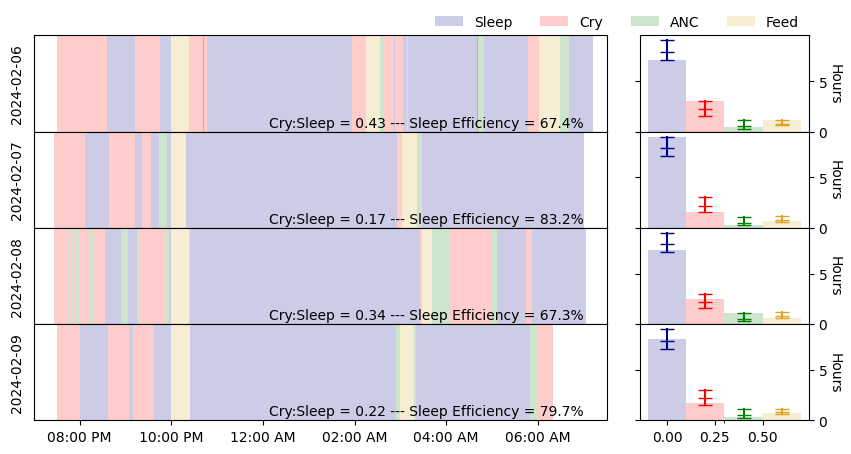

In [248]:
fig = plt.figure(figsize=(10,5))
ndays = len(cio_files)
gs = plt.GridSpec(ndays, 4, figure=fig,hspace=0)
event_log = {}

for dd,cio_f in enumerate(cio_files):
    event_counter = {'sleep':0,
                     'cry':0,
                     'ANC':0,
                     'feed':0}
    
    pax = fig.add_subplot(gs[dd, :3])
    
    cio_df = pd.read_csv(cio_f,parse_dates=True,index_col=0)
    day = cio_df.iloc[0].name.strftime('%Y-%m-%d')
    
    plt_start = pd.to_datetime(day) + pd.to_timedelta(pd.to_datetime(bed_time).hour,'h') + \
                pd.to_timedelta(pd.to_datetime(bed_time).minute,'min') - pd.to_timedelta(30,'min')
    plt_end = pd.to_datetime(day) + pd.to_timedelta(pd.to_datetime(wake_up).hour,'h') +  \
                pd.to_timedelta(pd.to_datetime(wake_up).minute,'min') + pd.to_timedelta(30,'min') + \
                pd.to_timedelta(1,'day')

    for event in cio_df.index:
        event_type = cio_df.loc[event].event.replace(' ','')
        event_length = cio_df.loc[event].length
        event_counter[event_type] += event_length
        event_start = event
        event_end = event_start + pd.to_timedelta(event_length,'min')
        event_c = event_color_dict[event_type]
        pax.fill_betweenx([0,1],event_start,event_end,color=event_c,alpha=0.2,lw=0.0)
    xticks = pd.date_range(pd.to_datetime(day),pd.to_datetime(day)+pd.to_timedelta(2,'day'),freq='2h')
    xtick_lbls = []
    for xt in xticks:
        xtick_lbls += [xt.strftime('%I:%M %p')]
    pax.set_xticks(xticks)
    pax.set_xticklabels(xtick_lbls)

    pax.set_xlim(plt_start,plt_end)
    pax.set_ylim(0,1)
    pax.set_yticks([0.5])
    pax.set_yticklabels([day],rotation=90,va='center')
    pax.tick_params(left=False)
    
    # Sleep-to-cry ratio
    scr = event_counter['cry']/event_counter['sleep']
    sleep_efficiency = 100.0*event_counter['sleep']/(sum(event_counter.values()) - event_counter['feed'])
    pax.text(plt_end - pd.to_timedelta(0.5,'h'),0.05,
             'Cry:Sleep = {0:3.2f} --- Sleep Efficiency = {1:3.1f}%'.format(
                 scr,sleep_efficiency),ha='right')
    
    

    #if dd == 0:
    #    pax.text(0.0,1.05,'sleep',transform=pax.transAxes,color=event_color_dict['sleep'])
    #    pax.text(0.1,1.05,'cry',transform=pax.transAxes,color=event_color_dict['cry'])
    #    pax.text(0.2,1.05,'feed',transform=pax.transAxes,color=event_color_dict['feed'])
    #    pax.text(0.3,1.05,'Awake, no cry',transform=pax.transAxes,color=event_color_dict['ANC'])
    event_log[day] = event_counter

sleep = []
feed = []
anc = []
cry = []
for day in event_log:
    sleep += [event_log[day]['sleep']/60.0]
    cry += [event_log[day]['cry']/60.0]
    anc += [event_log[day]['ANC']/60.0]
    feed += [event_log[day]['feed']/60.0]
    
max_time = np.max([sleep,cry,anc,feed])
max_sleep = np.max(sleep)
min_sleep = np.min(sleep)
avg_sleep = np.mean(sleep)

max_feed = np.max(feed)
min_feed = np.min(feed)
avg_feed = np.mean(feed)

max_cry = np.max(cry)
min_cry = np.min(cry)
avg_cry = np.mean(cry)

max_anc = np.max(anc)
min_anc = np.min(anc)
avg_anc = np.mean(anc)
    
for dd,day in enumerate(event_log):
    pax2 = fig.add_subplot(gs[dd, 3])
    sleep = [event_log[day]['sleep']/60.0]
    cry = [event_log[day]['cry']/60.0]
    anc = [event_log[day]['ANC']/60.0]
    feed = [event_log[day]['feed']/60.0]

    # Set position of bar on X axis 
    br1 = np.arange(1) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
    br4 = [x + barWidth for x in br3] 

    # Make the plot
    pax2.bar(br1, sleep, color =event_color_dict['sleep'], width = barWidth, 
            edgecolor ='none', label ='Sleep',alpha=0.2) 
    pax2.bar(br2, cry, color =event_color_dict['cry'], width = barWidth, 
            edgecolor ='none', label ='Cry',alpha=0.2) 
    pax2.bar(br3, anc, color =event_color_dict['ANC'], width = barWidth, 
            edgecolor ='none', label ='ANC',alpha=0.2) 
    pax2.bar(br4, feed, color =event_color_dict['feed'], width = barWidth, 
            edgecolor ='none', label ='Feed',alpha=0.2) 

    pax2.plot([br1,br1,br1],[min_sleep,avg_sleep,max_sleep],marker='_',c=event_color_dict['sleep'],markersize=10)
    pax2.plot([br2,br2,br2],[min_cry,avg_cry,max_cry],marker='_',c=event_color_dict['cry'],markersize=10)
    pax2.plot([br3,br3,br3],[min_anc,avg_anc,max_anc],marker='_',c=event_color_dict['ANC'],markersize=10)
    pax2.plot([br4,br4,br4],[min_feed,avg_feed,max_feed],marker='_',c=event_color_dict['feed'],markersize=10)
    #pax2.scatter([br1,br1,br1],[min_sleep,avg_sleep,max_sleep],marker='_',c='k',alpha=0.5)
    pax2.set_xticks([r + barWidth*1.5 for r in range(len(sleep))], event_log.keys())
    if dd == 0:
        pax2.legend(ncol=4,loc=(-1.25,1.01),frameon=False)
    pax2.tick_params(left=True,right=True,labelleft=False,labelright=True)
    pax2.set_ylabel('Hours',rotation=270,labelpad=10.5)

    pax2.yaxis.set_label_position("right")
    pax2.set_ylim(0,max_time+0.5)

/Users/patrickhawbecker/Code/Python/CIO/CIO - Day1.csv
/Users/patrickhawbecker/Code/Python/CIO/CIO - Day2.csv
/Users/patrickhawbecker/Code/Python/CIO/CIO - Day3.csv


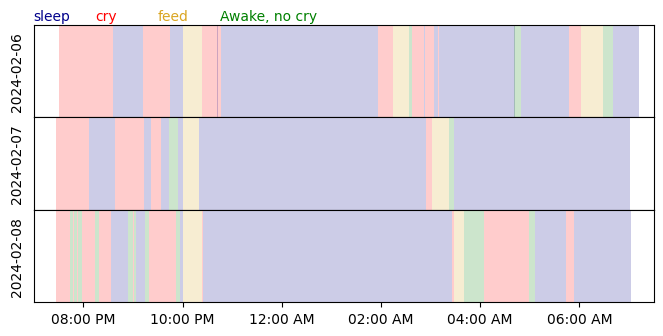

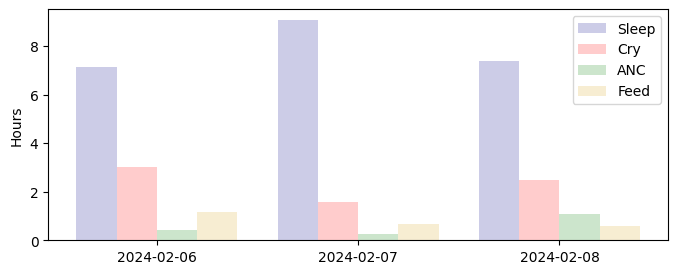

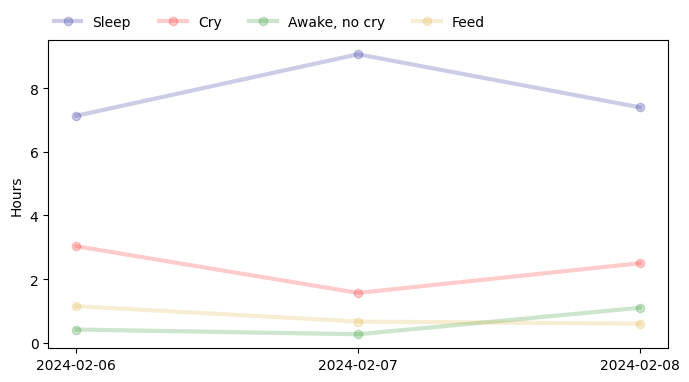

In [125]:
fig,ax = plt.subplots(nrows=len(cio_files),gridspec_kw={'hspace':0},figsize=(8,1.2*len(cio_files)))
event_log = {}
for dd,cio_f in enumerate(cio_files):
    event_counter = {'sleep':0,
                     'cry':0,
                     'ANC':0,
                     'feed':0}
    
    if len(cio_files) == 1:
        pax = ax
    else:
        pax = ax[dd]
    
    cio_df = pd.read_csv(cio_f,parse_dates=True,index_col=0)
    day = cio_df.iloc[0].name.strftime('%Y-%m-%d')
    
    plt_start = pd.to_datetime(day) + pd.to_timedelta(pd.to_datetime(bed_time).hour,'h') + \
                pd.to_timedelta(pd.to_datetime(bed_time).minute,'min') - pd.to_timedelta(30,'min')
    plt_end = pd.to_datetime(day) + pd.to_timedelta(pd.to_datetime(wake_up).hour,'h') +  \
                pd.to_timedelta(pd.to_datetime(wake_up).minute,'min') + pd.to_timedelta(30,'min') + \
                pd.to_timedelta(1,'day')

    for event in cio_df.index:
        event_type = cio_df.loc[event].event.replace(' ','')
        event_length = cio_df.loc[event].length
        event_counter[event_type] += event_length
        event_start = event
        event_end = event_start + pd.to_timedelta(event_length,'min')
        event_c = event_color_dict[event_type]
        pax.fill_betweenx([0,1],event_start,event_end,color=event_c,alpha=0.2,lw=0.0)
    xticks = pd.date_range(pd.to_datetime(day),pd.to_datetime(day)+pd.to_timedelta(2,'day'),freq='2h')
    xtick_lbls = []
    for xt in xticks:
        xtick_lbls += [xt.strftime('%I:%M %p')]
    pax.set_xticks(xticks)
    pax.set_xticklabels(xtick_lbls)

    pax.set_xlim(plt_start,plt_end)
    pax.set_ylim(0,1)
    pax.set_yticks([0.5])
    pax.set_yticklabels([day],rotation=90,va='center')
    pax.tick_params(left=False)

    if dd == 0:
        pax.text(0.0,1.05,'sleep',transform=pax.transAxes,color=event_color_dict['sleep'])
        pax.text(0.1,1.05,'cry',transform=pax.transAxes,color=event_color_dict['cry'])
        pax.text(0.2,1.05,'feed',transform=pax.transAxes,color=event_color_dict['feed'])
        pax.text(0.3,1.05,'Awake, no cry',transform=pax.transAxes,color=event_color_dict['ANC'])
    event_log[day] = event_counter
plt.show()

barWidth = 0.2
fig = plt.subplots(figsize =(8,3)) 

sleep = []
cry = []
anc = []
feed = []

for day in event_log:
    sleep += [event_log[day]['sleep']/60.0]
    cry += [event_log[day]['cry']/60.0]
    anc += [event_log[day]['ANC']/60.0]
    feed += [event_log[day]['feed']/60.0]

# Set position of bar on X axis 
br1 = np.arange(len(sleep)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 

# Make the plot
plt.bar(br1, sleep, color =event_color_dict['sleep'], width = barWidth, 
        edgecolor ='none', label ='Sleep',alpha=0.2) 
plt.bar(br2, cry, color =event_color_dict['cry'], width = barWidth, 
        edgecolor ='none', label ='Cry',alpha=0.2) 
plt.bar(br3, anc, color =event_color_dict['ANC'], width = barWidth, 
        edgecolor ='none', label ='ANC',alpha=0.2) 
plt.bar(br4, feed, color =event_color_dict['feed'], width = barWidth, 
        edgecolor ='none', label ='Feed',alpha=0.2) 

plt.xticks([r + barWidth*1.5 for r in range(len(sleep))], event_log.keys())
plt.legend()

plt.ylabel('Hours')
plt.show()

fig = plt.subplots(figsize =(8,4)) 

sleep = []
cry = []
anc = []
feed = []

for day in event_log:
    sleep += [event_log[day]['sleep']/60.0]
    cry += [event_log[day]['cry']/60.0]
    anc += [event_log[day]['ANC']/60.0]
    feed += [event_log[day]['feed']/60.0]

plt.plot(list(event_log.keys()),sleep,color=event_color_dict['sleep'],
         lw=3.0,alpha=0.2,marker='o',label='Sleep')
plt.plot(list(event_log.keys()),cry,color=event_color_dict['cry'],
         lw=3.0,alpha=0.2,marker='o',label='Cry')
plt.plot(list(event_log.keys()),anc,color=event_color_dict['ANC'],
         lw=3.0,alpha=0.2,marker='o',label='Awake, no cry')
plt.plot(list(event_log.keys()),feed,color=event_color_dict['feed'],
         lw=3.0,alpha=0.2,marker='o',label='Feed')

plt.ylabel('Hours')
plt.legend(frameon=False,ncol=4,loc=[0.0,1.02])
plt.show()